In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import uproot4
import pandas as pd

In [28]:
path_to_hists = "E:/score/" 
#dt_file = ['LYAttenuation','LYDown','LYRayleigh','Recomb2','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ_with_splines','WireModThetaYZ_without_splines','WireModX','WireModYZ','CV_sp']
#dt_variaition = ['LYAttenuation','LYDown','LYRayleigh','Recomb2','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ_with_splines','WireModThetaYZ_without_splines','WireModX','WireModYZ']
dt_file = ['LYAttenuation','LYDown','LYRayleigh','Recomb2','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ','WireModX','WireModYZ','CV_sp']
dt_variaition = ['LYAttenuation','LYDown','LYRayleigh','Recomb2','SCE','WireModdEdX','WireModThetaXZ','WireModThetaYZ','WireModX','WireModYZ']
pot_exp_R1 = [2,2,2,2,2,2,2,2,2,2,2,2]
N_A=[144410,139739,144410,145376,145231,143782,144194,143759,144622,143993,144788,144610]
N_B=[144457,139878,144658,145748,145658,143876,144271,144631,144669,144058,144835,144652]
POT_MC=[3.64,3.57,3.69,3.72,3.71,3.67,3.68,3.69,3.69,3.67,3.70,3.69]
weight=(np.array(pot_exp_R1)/np.array(POT_MC))*(np.array(N_B)/np.array(N_A))
names=locals()

In [26]:
def logit_transform(score):
    return np.log(score/(1-score))

def filter_df(df):
    df = df[df >= 0.5]
    return df 

In [29]:
for var,w in zip(dt_file,weight):
    file_name="run1_numi_"+str(var)+"_score.root"
    print("Opening file: ", file_name)
    file = uproot4.open(path_to_hists+file_name)
    tree = file["events;1"]
 
    shwr_max_energy = tree['reco_shower_energy_max'].array(library='ak')
    bdt = tree['bdt_score'].array(library='ak')

    shower_energy = []
    bdt_s = []

    for i,j in zip(shwr_max_energy,bdt):
        shower_energy.append(i)
        bdt_s.append(j)
    
    names['shower_energy_' + str(var)] = np.array(shower_energy)/1000
    bdt_s=np.array(bdt_s)
    bdt_s=filter_df(bdt_s)
    bdt_s=logit_transform(bdt_s)
    names['bdt_' + str(var)] = bdt_s

    names['weight_' + str(var)] = w


Opening file:  run1_numi_LYAttenuation_score.root
Opening file:  run1_numi_LYDown_score.root
Opening file:  run1_numi_LYRayleigh_score.root
Opening file:  run1_numi_Recomb2_score.root
Opening file:  run1_numi_SCE_score.root
Opening file:  run1_numi_WireModdEdX_score.root
Opening file:  run1_numi_WireModThetaXZ_score.root
Opening file:  run1_numi_WireModThetaYZ_score.root
Opening file:  run1_numi_WireModX_score.root
Opening file:  run1_numi_WireModYZ_score.root
Opening file:  run1_numi_CV_sp_score.root


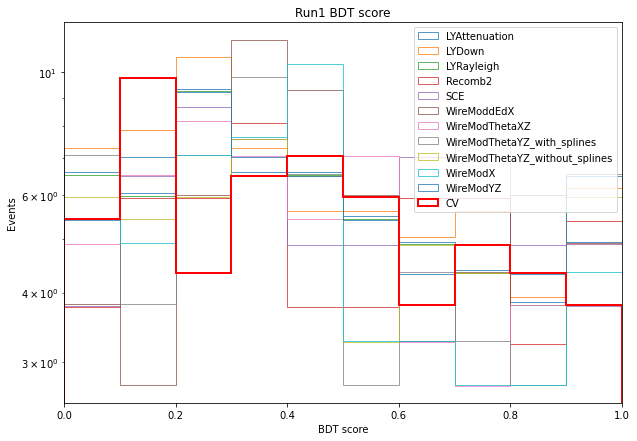

In [7]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.xlim(0,1)
#plt.ylim(0.1,100000.)
plt.title('Run1 BDT score')
(counts_std, bins_std) = np.histogram(names['bdt_' + 'CV_sp'], bins=np.linspace(0,1,11))
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=np.linspace(0,1,11))
    plt.hist(bins[:-1], bins, weights=counts* names['weight_' + str(var)],alpha=0.75, histtype='step',label=str(var))
plt.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp,histtype='step',lw=2,label='CV',color='r')
plt.legend()
plt.show()

C:\Users\steve\AppData\Local\Temp\ipykernel_1576\1632690515.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[-1,-0.5,0,0.5,1], sharex=main_ax)


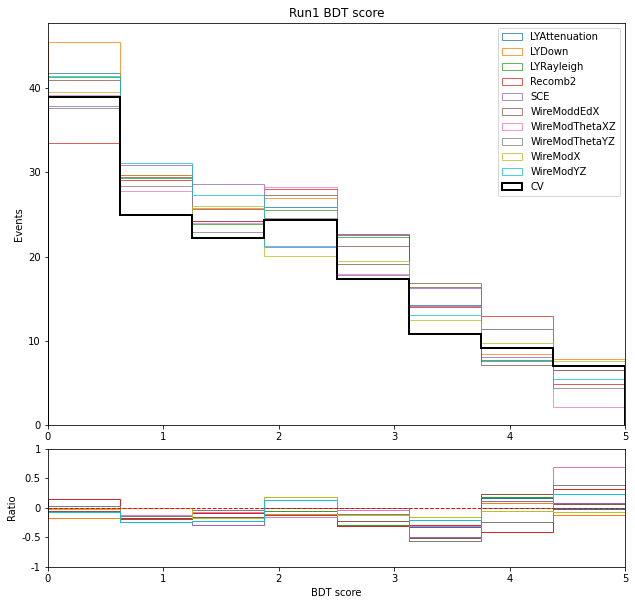

In [31]:
fig = plt.figure(figsize=(14, 10))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[-1,-0.5,0,0.5,1], sharex=main_ax)
#plt.yscale('log')
main_ax.set_title('Run1 BDT score')
plt.xlabel('BDT score')
main_ax.set_ylabel(r'Events')
x_hist.set_ylabel('Ratio')
plt.xlim(0,5)

#plt.title('Run1 BDT score')

(counts_std, bins_std) = np.histogram(names['bdt_' + 'CV_sp'], bins=np.linspace(0,5,9))
cv = (counts_std*weight_CV_sp)
error = np.zeros(8) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=np.linspace(0,5,9))
    main_ax.hist(bins[:-1], bins, weights=counts* names['weight_' + str(var)],alpha=0.75, histtype='step',label=str(var))
    vars=(counts*names['weight_' + str(var)])
    ratio = (cv-vars)/cv
    x_hist.hist(bins[:-1],bins,weights=ratio,histtype='step',orientation='vertical',label=str(var)) 
x=[[0,0.2],[0.2,0.4],[0.4,0.6],[0.6,0.8],[0.8,1.0]]
w1=counts_std*weight_CV_sp*0.7
w2=counts_std*weight_CV_sp*1.3
#main_ax.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp*0.7,histtype='stepfilled',color='snow')
#main_ax.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp*1.3,histtype='stepfilled',color='grey',alpha=0.5)
#main_ax.fill_between(x[0], w1[0], w2[0], alpha=0.2,interpolate=False,color='grey')
#main_ax.fill_between(x[1], w1[1], w2[1], alpha=0.2,interpolate=False,color='grey')
#main_ax.fill_between(x[2], w1[2], w2[2], alpha=0.2,interpolate=False,color='grey')
#main_ax.fill_between(x[3], w1[3], w2[3], alpha=0.2,interpolate=False,color='grey')
#main_ax.fill_between(x[4], w1[4], w2[4], alpha=0.2,interpolate=False,color='grey')
    
main_ax.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp,histtype='step',lw=2,label='CV',color='black')
x_hist.axhline(y=0,ls='--',c='r',lw=1)
x_hist.set_ylim(-1,1)
#x_hist.set_yticklabels(-0.5,0.5)
main_ax.legend()
plt.show()

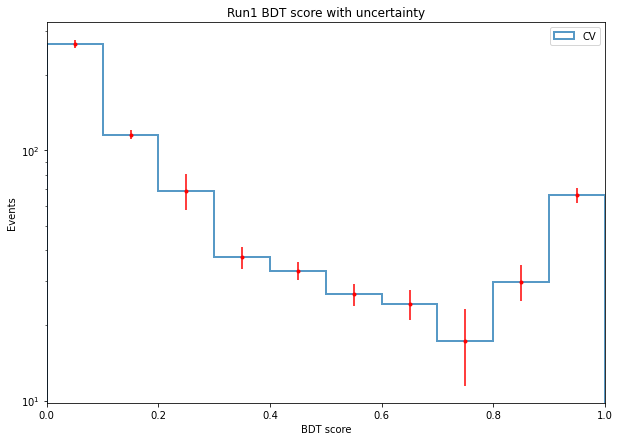

In [5]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.xlim(0,1)
#plt.ylim(0.1,10000.)
plt.title('Run1 BDT score with uncertainty')
(counts_std, bins_std) = np.histogram(names['bdt_' + 'CV_sp'], bins=np.linspace(0,1,11))
cv = (counts_std*weight_CV_sp)
error = np.zeros(10) 
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=np.linspace(0,1,11))
    vars=(counts*names['weight_' + str(var)])
    div=np.square(cv-vars)
    error=div+error
err=np.sqrt(error/11)
plt.hist(bins_std[:-1], bins_std, weights=weight_CV_sp* counts_std ,alpha=0.75, lw=2,histtype='step',label='CV')
plt.errorbar(0.5*(bins_std[:-1]+bins_std[1:]), weight_CV_sp * counts_std, yerr=err, fmt='r.')
plt.legend()
plt.show()

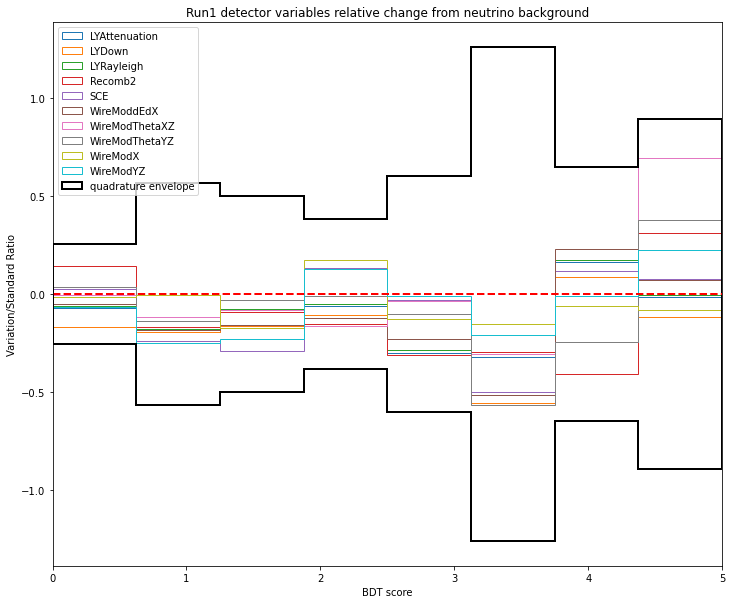

In [39]:
plt.figure(figsize=(12,10))
plt.xlabel('BDT score')
plt.ylabel(r'Variation/Standard Ratio')
plt.xlim(0,5)
plt.title('Run1 detector variables relative change from neutrino background')
(counts_sd, bins_sd) = np.histogram(names['bdt_' + 'CV_sp'], bins=8, range = (0., 5.))
error = np.zeros(8) 
cv = (counts_sd*names['weight_' + 'CV_sp'])
for var in dt_variaition:
    (counts, bins) = np.histogram(names['bdt_' + str(var)], bins=8, range = (0., 5.))
    vars=(counts*names['weight_' + str(var)])
    ratio = (cv-vars)/cv
    plt.hist(bins[:-1],bins,weights=ratio,histtype='step',label=str(var)) 
    error=ratio**2+error
err=np.sqrt(error)
plt.hist(bins[:-1],bins,weights=err,histtype='step',color='black',label='quadrature envelope',lw=2) 
plt.hist(bins[:-1],bins,weights=-err,histtype='step',color='black',lw=2) 
plt.axhline(y=0,ls='--',c='r',lw=2)
plt.legend(loc='upper left')
plt.show()

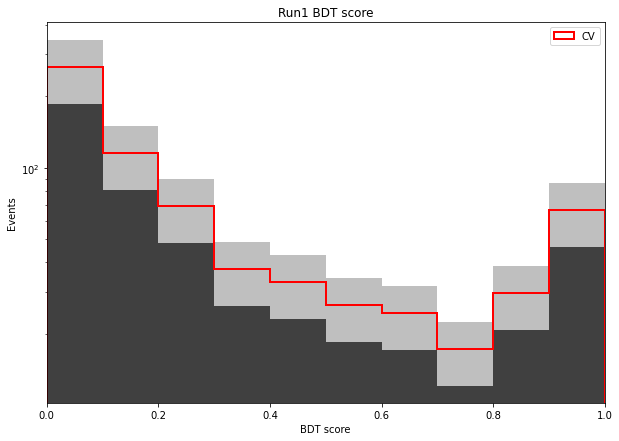

In [82]:
plt.figure(figsize=(10,7))
plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.xlim(0,1)
#plt.ylim(0.1,100000.)
plt.title('Run1 BDT score')
(counts_std, bins_std) = np.histogram(names['bdt_' + 'CV_sp'], bins=np.linspace(0,1,11))

plt.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp,histtype='step',lw=2,label='CV',color='r')
plt.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp*0.7,histtype='stepfilled',color='k')
plt.hist(bins_std[:-1], bins_std , weights= counts_std*weight_CV_sp*1.3,histtype='stepfilled',color='grey',alpha=0.5)
plt.legend()
plt.show()